![title](https://blockchain.oodles.io/wp-content/themes/blockchain/assets/images/Fintech/fintech-banner-1.jpg)

<H1 align="center"> Twitter y herramientas de BigData para explorar datos para en sector Bancario del Ecuador </center></H1> <br> <br><br> 

<center> Roque Leal </center> 
<center>DataScience </center> <br> 

## Resumen

El presente Jupyter Notebook  correponde a una exploración de los datos en la red social Twitter asociados a usuarios del sector bancario del Ecuador @BancoPichincha,@BancoPacificoEC,@BancoGuayaquil,@produbancoec,@solidarioec, lamentando los hechos de los sucesos que desencadenaron en el fallecimiento del Ciudadano Ex-Presidente del Perú, se realiza el informe como una aproximación científica de diferentes métodos para colectar y analizar datos en Twitter basado en las herramientas disponibles de Python.

In [39]:
import tweepy           # Para consumir la API de Twitter
import pandas as pd     # Para manejo de datos
import numpy as np      # Para operaciones numéricas

# Para ploteo y visualización:
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

##  App de Twitter

Para poder extraer tweets de las cuentas @BancoPichincha,@BancoPacificoEC,@BancoGuayaquil,@produbancoec,@solidarioec para un posterior análisis, creamos una aplicación basados en los servicios de Twitter. El sitio para poder hacer eso es [https://apps.twitter.com/](https://apps.twitter.com/).

De esta app utilizaremos la siguiente información:
* Consumer Key (API Key)
* Consumer Secret (API Secret)
* Access Token
* Access Token Secret

Ahora comenzaremos a a consumir el API de Twitter. Para ello, creamos una función que nos permita autenticar nuestras llaves de acceso y consumo.

In [40]:
from credentials import *
def twitter_config():

    # Autenticar y acceder usando llaves:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Regresar acceso al API:
    api = tweepy.API(auth)
    return api

## Extraemos tweets

Ahora se construye un extractor de datos de Twitter para el usuario de @BancoPichincha, usando el API Rest de Twitter para crear una ventana de búsqueda en el pasado de unos 60 días contados desde hoy 07 de febrero del 2020 y utilizando la cuenta de  @BancoPichincha como usuario a minar. A manera de un ejercicio práctico sólo analizaremos los últimos 200 tweets dentro de la ventana de tiempo que nos permite twitter


In [41]:
extractor = twitter_config()

# Creamos una lista de tweets:
tweets = extractor.user_timeline(screen_name="BancoPichincha", count=200)
print("Tweets obtenidos: {}.\n".format(len(tweets)))

# Imprimimos los primeros 5 tweets:
print("Los primeros 5 tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Tweets obtenidos: 200.

Los primeros 5 tweets:

🔒Conoce lo que es un Emotet y por qué debes verificar la fuente original de tus correos electrónicos, de sus archiv… https://t.co/w1HyV3ZZLz

@Edwin_Tiburon ¡Buen día! El número a nivel nacional de Pague Ya es (02)2502010 opción 1. Saludos

@eduardo62272600 ¡Buen día! Como le indicamos en nuestro mensaje anterior, para poder atender su caso necesitamos q… https://t.co/klmTbiok2u

@andres123alb @PoliciaEcuador ¡Buen día! ¡Es un FRAUDE! Nunca enviamos este tipo de mensajes, ni por SMS ni por cor… https://t.co/k4M4MigUoW

✨ Para reflexionar...  #BuenasNoches https://t.co/t4WtottJfK



## Creamos un Dataframe

Esto nos permite tener un ploteo más amigable usando el método head para visualizar sólo los primeros 10 tweets de la cuenta  @BancoPichincha (o el número que elementos que se le pasen como argumento).

In [42]:
datos = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
display(datos.head(10))

,Tweets
0,🔒Conoce lo que es un Emotet y por qué debes ve...
1,@Edwin_Tiburon ¡Buen día! El número a nivel na...
2,@eduardo62272600 ¡Buen día! Como le indicamos ...
3,@andres123alb @PoliciaEcuador ¡Buen día! ¡Es u...
4,✨ Para reflexionar... #BuenasNoches https://t...
5,👇 Así nos estamos transformando.\n#DigitalQuit...
6,¿Eres titular de una de nuestras tarjetas de c...
7,@Elenarohel ¡Buen día! Gracias por enviarnos l...
8,@FrancisJacome 3. Escoja la opción “Referencia...
9,"@FrancisJacome ¡Buen día! Sí, es posible solic..."


Vamos agregar nuevos elementos de los tweets para explorar las caracteristicas de cada tweet

In [43]:
# Añadimos datos relevantes:
datos['len'] = np.array([len(tweet.text) for tweet in tweets])
datos['ID']  = np.array([tweet.id for tweet in tweets])
datos['Creado'] = np.array([tweet.created_at for tweet in tweets])
datos['Fuente'] = np.array([tweet.source for tweet in tweets])
datos['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
datos['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [44]:
display(datos.head(10))

,Tweets,len,ID,Creado,Fuente,Likes,RTs
0,🔒Conoce lo que es un Emotet y por qué debes ve...,140,1225875416382164993,2020-02-07 20:14:09,Twitter Web App,3,1
1,@Edwin_Tiburon ¡Buen día! El número a nivel na...,97,1225862695121031169,2020-02-07 19:23:36,AgoraPulse Manager,0,0
2,@eduardo62272600 ¡Buen día! Como le indicamos ...,140,1225793014922141697,2020-02-07 14:46:43,AgoraPulse Manager,0,0
3,@andres123alb @PoliciaEcuador ¡Buen día! ¡Es u...,140,1225709879811330048,2020-02-07 09:16:22,AgoraPulse Manager,1,2
4,✨ Para reflexionar... #BuenasNoches https://t...,60,1225608871177121792,2020-02-07 02:35:00,TweetDeck,14,0
5,👇 Así nos estamos transformando.\n#DigitalQuit...,88,1225578792023986177,2020-02-07 00:35:28,Twitter Ads,3,1
6,¿Eres titular de una de nuestras tarjetas de c...,140,1225556023429214209,2020-02-06 23:05:00,Twitter Ads,14,1
7,@Elenarohel ¡Buen día! Gracias por enviarnos l...,139,1225528954569793536,2020-02-06 21:17:26,AgoraPulse Manager,0,0
8,@FrancisJacome 3. Escoja la opción “Referencia...,140,1225526631021916163,2020-02-06 21:08:12,AgoraPulse Manager,0,0
9,"@FrancisJacome ¡Buen día! Sí, es posible solic...",140,1225526616773795840,2020-02-06 21:08:09,AgoraPulse Manager,0,0


## Descripción básica

En este apartado investigaremos sobre estadísticos básicos de la información minada, como la media de las longitudes de cada tweet, cuál fue el tweet con más favoritos, cuál fue el tweet más retweeteado, etc.

In [45]:
# Extraemos el promedio:
media = np.mean(datos['len'])

print("El promedio de caracteres en tweets: {}".format(media))

# Extraemos el tweet con más FAVs y con más RTs:
fav_max = np.max(datos['Likes'])
rt_max  = np.max(datos['RTs'])

fav = datos[datos.Likes == fav_max].index[0]
rt  = datos[datos.RTs == rt_max].index[0]

# Max FAVs:
print("El tweet con más likes es: \n{}".format(datos['Tweets'][fav]))
print("Número de likes: {}".format(fav_max))
print("{} caracteres.\n".format(datos['len'][fav]))

# Max RTs:
print("El tweet con más retweets es: \n{}".format(datos['Tweets'][rt]))
print("Número de retweets: {}".format(rt_max))
print("{} caracteres.\n".format(datos['len'][rt]))

El promedio de caracteres en tweets: 129.115
El tweet con más likes es: 
¿Necesitas crear alianzas estratégicas para tu empresa? Entonces, ¡es crucial que seas un buen negociador! En… https://t.co/0Z2v2WfRFh
Número de likes: 230
134 caracteres.

El tweet con más retweets es: 
¿Necesitas crear alianzas estratégicas para tu empresa? Entonces, ¡es crucial que seas un buen negociador! En… https://t.co/0Z2v2WfRFh
Número de retweets: 43
134 caracteres.



## Series de tiempo

Teniendo los tweets como vectores basado en las fechas de creación, podemos construir una serie de tiempo con respecto a longitudes de tweets, favoritos y retweets.

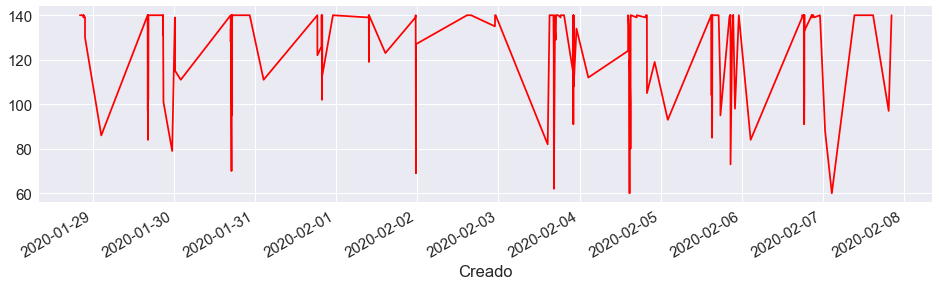

In [46]:
# Creamos series de tiempo para datos:
tlen = pd.Series(data=datos['len'].values, index=datos['Creado'])
tfav = pd.Series(data=datos['Likes'].values, index=datos['Creado'])
tret = pd.Series(data=datos['RTs'].values, index=datos['Creado'])
tlen.plot(figsize=(16,4), color='r');

En este caso observamos que la cuenta @BancoPichincha mantiene un comportamiento constante.

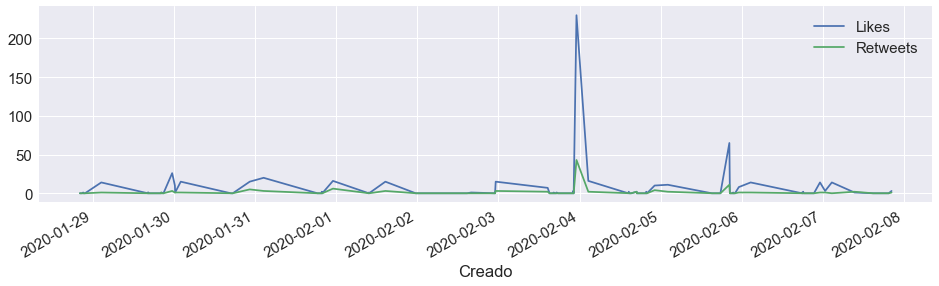

In [47]:
# Visualización de likes vs retweets:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

Presentando una gráfica de las interacciones causadas por cada tweet de la cuenta @BancoPichincha, observamos los likes y retweets originados, los cuales alcanzaron una audiencia de hasta 250 cuentas que interactuaron 

## Pie charts de dispositivos

Basados en los metadatos de la tweets de @BancoPichincha es propicia la ocasión de conocer desde que dispositivo fue creado, en este caso la totalidad ha tenido por origen el gestor de AgoraPulse Manager, como lo vemos en la siguiente gráfica.

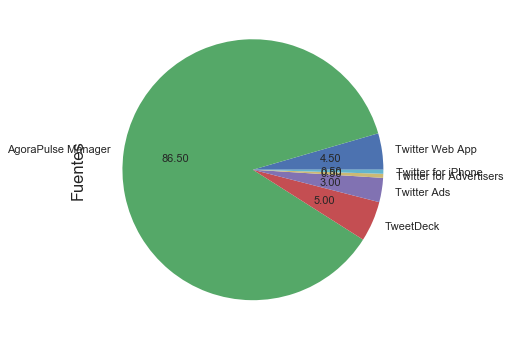

In [48]:
fuentes = []
for fuente in datos['Fuente']:
    if fuente not in fuentes:
        fuentes.append(fuente)
percent = np.zeros(len(fuentes))

for fuente in datos['Fuente']:
    for index in range(len(fuentes)):
        if fuente == fuentes[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=fuentes, name='Fuentes')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

## Polaridad 

Realizado el análisis base se puede utilizar tambien el modelo de vaderSentiment una libreria de análisis de sentimientos basada en reglas y léxicos que está específicamente en sintonía con los sentimientos expresados en las redes sociales y para este caso vamos a extraer los principales 1200 tweets relacionados a reacciones de los usuarios de Twitter con cinco cuentas: @BancoPichincha,@BancoPacificoEC,@BancoGuayaquil,@produbancoec,@solidarioec de esta manera calcularemos la polaridad de los sentimientos expresados para cada una de las 5 cuentas utilizando esta base de 6.000 Tweets.

In [49]:
import tweepy
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
sns.set()
import pandas as pd
import numpy as np
from datetime import datetime
import math
import json

In [50]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [51]:
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

In [52]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [53]:
target_terms = ["@BancoPichincha", "@BancoPacificoEC","@BancoGuayaquil","@produbancoec","@solidarioec"]

In [54]:
sentiments = []
desired = 300

In [55]:
for target in target_terms:
        counter = 0

        while (counter < desired):  
            public_tweets = api.search(target, count=(desired-counter), result_type="recent")
            
            for tweet in public_tweets['statuses']:      
                results = analyzer.polarity_scores(tweet["text"])  
                compound = results["compound"]
                pos = results["pos"]
                neu = results["neu"]
                neg = results["neg"]
                
                
                Date = str(datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y"))
                Date = Date[:19]    
        
                
                sentiments.append({"Source": target,
                            "Text": tweet["text"],
                            "DateTime": Date, 
                            "Compound": compound,
                            "Pos": pos,
                            "Neg": neu,
                            "Neu": neg,
                            "Tweets Ago": counter+1})

                counter = counter + 1
    
sentiments_df = pd.DataFrame.from_dict(sentiments)  

sentiments_df

,Compound,DateTime,Neg,Neu,Pos,Source,Text,Tweets Ago
0,0.3182,2020-02-07 21:04:19,0.905,0.000,0.095,@BancoPichincha,RT @BancoPichincha: 🔒Conoce lo que es un Emote...,1
1,0.0000,2020-02-07 21:02:53,1.000,0.000,0.000,@BancoPichincha,"BANCO PICHINCHA C.A. $PCH cerró hoy a $91.0, 1...",2
2,0.0000,2020-02-07 20:56:07,1.000,0.000,0.000,@BancoPichincha,"¿Qué opinarías si tu eslogan fuera ""Nuestra me...",3
3,0.0000,2020-02-07 20:34:55,1.000,0.000,0.000,@BancoPichincha,Es imposible que el la Agencia del @BancoPichi...,4
4,0.3182,2020-02-07 20:16:15,0.723,0.000,0.277,@BancoPichincha,RT @BancoPichincha: ✨ Para reflexionar... #Bu...,5
5,0.0000,2020-02-07 19:51:39,1.000,0.000,0.000,@BancoPichincha,@novaecuador @davalos2019 @superbancosEC @Banc...,6
6,0.0000,2020-02-07 19:48:39,1.000,0.000,0.000,@BancoPichincha,@Juancitojaid @Julyberth @CrediScotiaPE @Indec...,7
7,0.0000,2020-02-07 19:40:22,1.000,0.000,0.000,@BancoPichincha,@alvaro_vizuete @davalos2019 @superbancosEC @B...,8
8,0.4019,2020-02-07 19:27:45,0.886,0.000,0.114,@BancoPichincha,RT @Ley__Fernanda: @Denuncias_ecu Buenas tarde...,9
9,0.0000,2020-02-07 19:25:59,1.000,0.000,0.000,@BancoPichincha,@404Flygon @gonzAL1901 @BCPComunica @interbank...,10


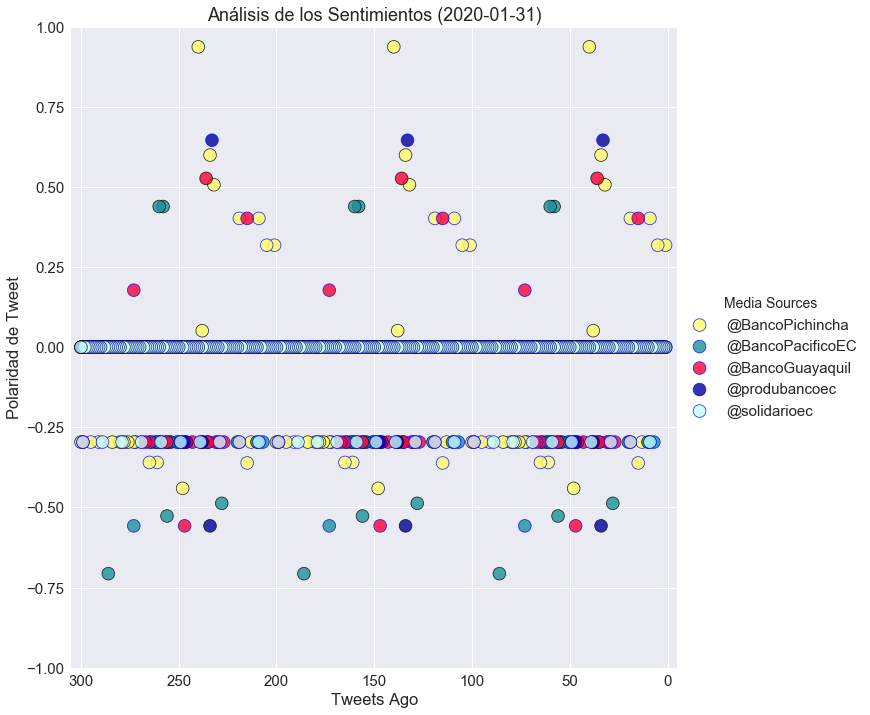

In [56]:
markersize = 160 
kws = dict(s=markersize, linewidth=.8, edgecolor="bk")
sns.set(font_scale = 1.5)

max_tweets = sentiments_df["Tweets Ago"].max()

pyber_palette = ['#ffff66','#1b919a','#ff0033','#000099','#c6fcff']  

sentiments_df.rename(columns = {'Source':'Media Sources'}, inplace = True)  

Date = Date[:10] 

sns.lmplot(x='Tweets Ago', y='Compound', data=sentiments_df,
            fit_reg=False,
            palette=pyber_palette, 
            scatter_kws=kws,
            hue= 'Media Sources',
            size = 10,
            legend_out=True)
plt.title("Análisis de los Sentimientos ({})".format(Date))
plt.ylabel("Polaridad de Tweet")
plt.xlabel("Tweets Ago")
plt.xlim(max_tweets+5, -5.0)  
plt.ylim(-1, 1)

plt.savefig("Sentiment Analysis of Media Tweets.png")

plt.show()

@BancoPichincha = -0.033136, @BancoPacificoEC = -0.06135899999999995, @BancoGuayaquil = -0.027069000000000003, @produbancoec = -0.007995999999999998, @solidarioec = -0.0296


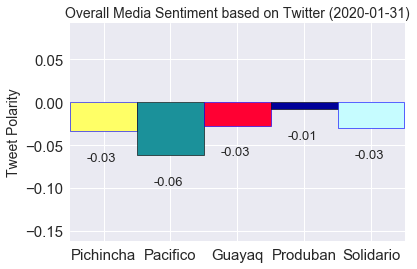

In [57]:
BancoPichincha = sentiments_df.groupby('Media Sources')['Compound'].mean()['@BancoPichincha']
BancoPacificoEC = sentiments_df.groupby('Media Sources')['Compound'].mean()['@BancoPacificoEC']
BancoGuayaquil = sentiments_df.groupby('Media Sources')['Compound'].mean()['@BancoGuayaquil']
produbancoec = sentiments_df.groupby('Media Sources')['Compound'].mean()['@produbancoec']
solidarioec = sentiments_df.groupby('Media Sources')['Compound'].mean()['@solidarioec']
print("@BancoPichincha = " + str(BancoPichincha) + ", @BancoPacificoEC = " + str(BancoPacificoEC) + ", @BancoGuayaquil = " + str(BancoGuayaquil) +", @produbancoec = " + str(produbancoec) +", @solidarioec = " + str(solidarioec))

x_labels = ['Pichincha','Pacifico','Guayaq','Produban','Solidario']
y_sentiments = [BancoPichincha,BancoPacificoEC,BancoGuayaquil,produbancoec,solidarioec]
palette = ['#ffff66','#1b919a','#ff0033','#000099','#c6fcff']  

x_pos = [0,1,2,3,4]    
plt.bar(x_pos, y_sentiments, color=sns.color_palette(palette,5), align='center', width = 1, edgecolor = 'bk', linewidth = .6)
plt.xlim(-0.5, len(x_labels)-0.49)  
plt.ylim(min(y_sentiments)-0.1, max(y_sentiments)+0.1) 
plt.xticks(x_pos, x_labels)
plt.title("Overall Media Sentiment based on Twitter ({})".format(Date), fontsize=14)
plt.ylabel("Tweet Polarity", fontsize=14)
for a,b in zip(x_pos, y_sentiments): 
    if b <= 0:
        B = b-0.035                  
    else:                             
        B = b+0.015                  
    plt.text(a-0.25, B, str(round(b, 2)), fontsize = 13)  


plt.savefig("Overall Media Sentiment based on Twitter.png")

plt.show()

En esta oportunidad basado en muestra de 6000 tweets y usando las cinco cuentas para la comparación se tiene la cuenta de @BancoPacificoEC como la principal que se asocia con sentimientos negativos por parte de la muestra, precedida por la cuenta @BancoPichincha, @BancoGuayaquil, @solidarioec y finalmente la cuenta @produbancoec. Todas ellas polarizadas a sentimientos negativos.

## Conclusiones

Los resultados presentan diferentes soluciones en cuanto al análisis de contenido en twitter a partir de diferentes librerias de Python, la interpretación de ellos es a juicio de los lectores y espera ser una aproximación inicial para que permita involucrarlos en la exploración de los datos en redes sociales como parte del estudio sobre el comportamiento de las audiencias y los fenómenos sociales. 

# Referencias

1. [Documentación oficial de Tweepy](http://tweepy.readthedocs.io/en/v3.5.0/).
2. [Documentación oficial de NumPy](https://docs.scipy.org/doc/numpy-dev/index.html).
3. [Documentación oficial de Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html).
4. [Documentación oficial de Matplotlib](http://matplotlib.org/index.html).
5. [Sitio oficial de Seaborn](https://seaborn.pydata.org/).
6. [Documentación oficial de TextBlob](https://textblob.readthedocs.io/en/dev/).
7. [Creación de clasificadores con TextBlob](https://textblob.readthedocs.io/en/dev/classifiers.html).